IMPORTING LIBRARIES

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

FETCHING DATA & STANDARD DEVIATION - MEAN

In [166]:
symbol = "TCS"
data = pd.read_csv(f'../{symbol}_stock_data.csv')

data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.set_index('Date', inplace=True)

data['20_MA'] = data['Close'].rolling(window=20).mean() #20 moving average
data['std'] = data['Close'].rolling(window=20).std() #standard deviation

CALCULATE UPPER AND LOWER BOUNDARIES

In [167]:
data['upper_band'] = data['20_MA'] + (data['std'] * 2) #upper and lower band calculation
data['lower_band'] = data['20_MA'] - (data['std'] * 2)

MAKING INDEX SORTED (X AXIS)

In [168]:
data.sort_index(inplace=True)

PLOTTING BOLLINGER BANDS

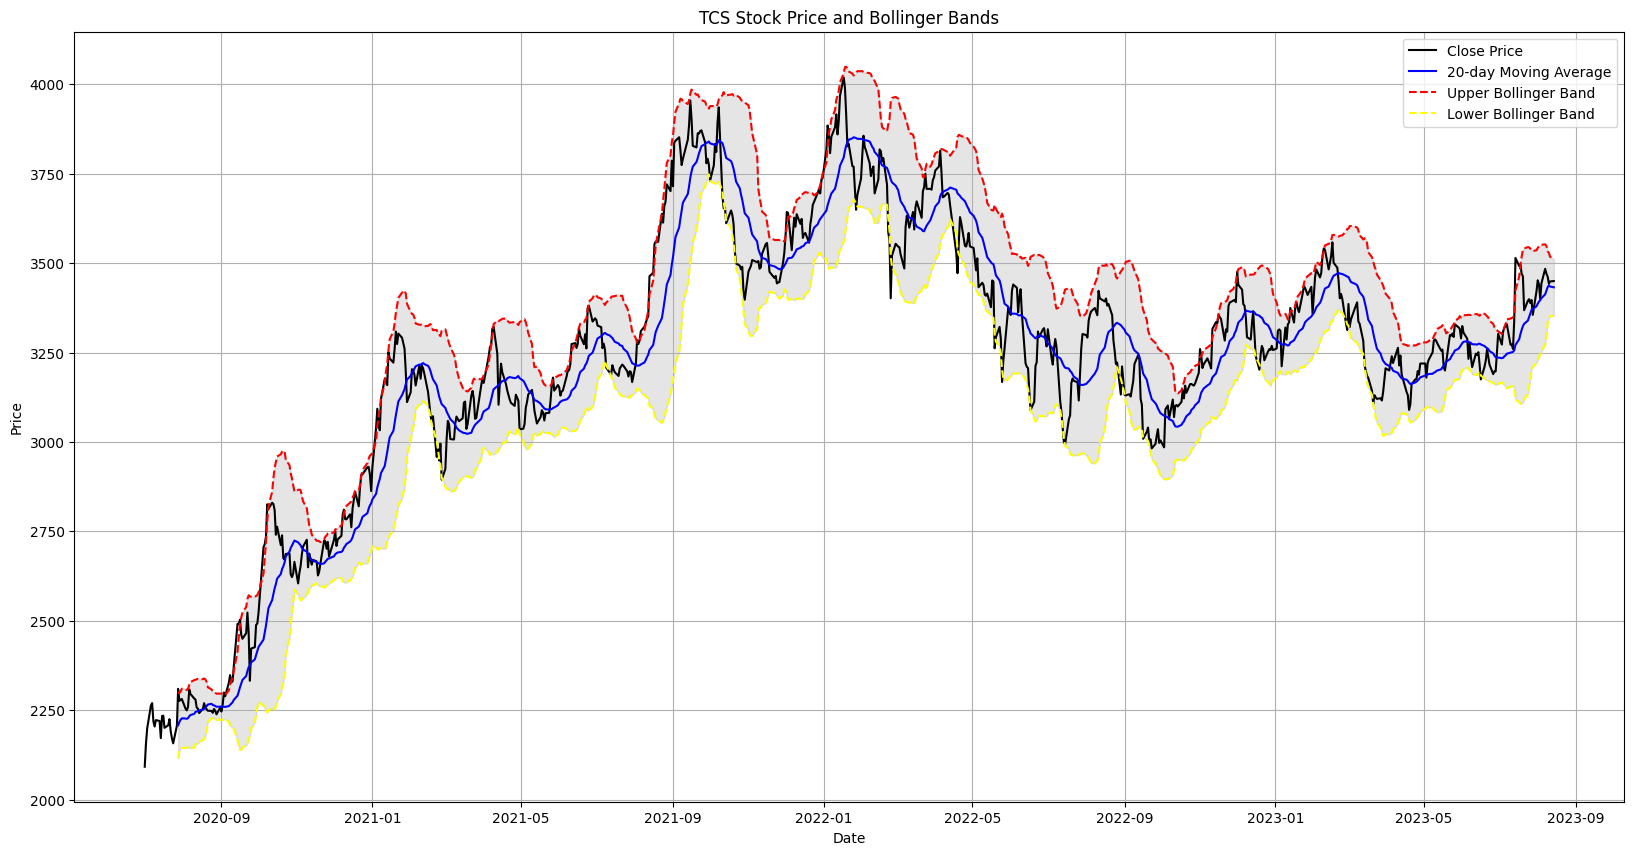

In [169]:
plt.figure(figsize=(20, 10))

plt.plot(data.index, data['Close'], label='Close Price', color='black')
plt.plot(data.index, data['20_MA'], label='20-day Moving Average', color='blue')
plt.plot(data.index, data['upper_band'], label='Upper Bollinger Band', color='red', linestyle='dashed')
plt.plot(data.index, data['lower_band'], label='Lower Bollinger Band', color='yellow', linestyle='dashed')
plt.fill_between(data.index, data['upper_band'], data['lower_band'], color='gray', alpha=0.2)

plt.title(f"{symbol} Stock Price and Bollinger Bands")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

PRINTING TABLE OVERSOLD & OVERBOUGHT

In [170]:
start_date = '2023-01-01'
end_date = '2023-06-01'
selected_data = data[start_date:end_date]
selected_data['Signal'] = 'Normal'

selected_data.loc[selected_data['Close'] > selected_data['upper_band'], 'Signal'] = 'Overbought'
selected_data.loc[selected_data['Close'] < selected_data['lower_band'], 'Signal'] = 'Oversold'

signal_table = selected_data[selected_data['Signal'].isin(['Overbought', 'Oversold'])][['Close', 'Signal']].copy()

print(signal_table)


                  Close      Signal
Date                               
2023-01-13  3374.550049  Overbought
2023-02-08  3520.100098  Overbought
2023-02-09  3540.850098  Overbought
2023-02-27  3331.850098    Oversold
2023-02-28  3312.850098    Oversold
2023-03-14  3214.949951    Oversold


-1 AND 1 FOR THE SIGNAL GENERATION

In [171]:
data['Signal'] = 0
data.loc[data['Close'] > data['upper_band'], 'Signal'] = -1  # Overbought
data.loc[data['Close'] < data['lower_band'], 'Signal'] = 1   # Oversold

# Select data for one month (e.g., August 2023)
start_date = '2023-01-01'
end_date = '2023-06-01'
selected_data = data[start_date:end_date]


PLOTTING WITH SIGNAL SCATTER

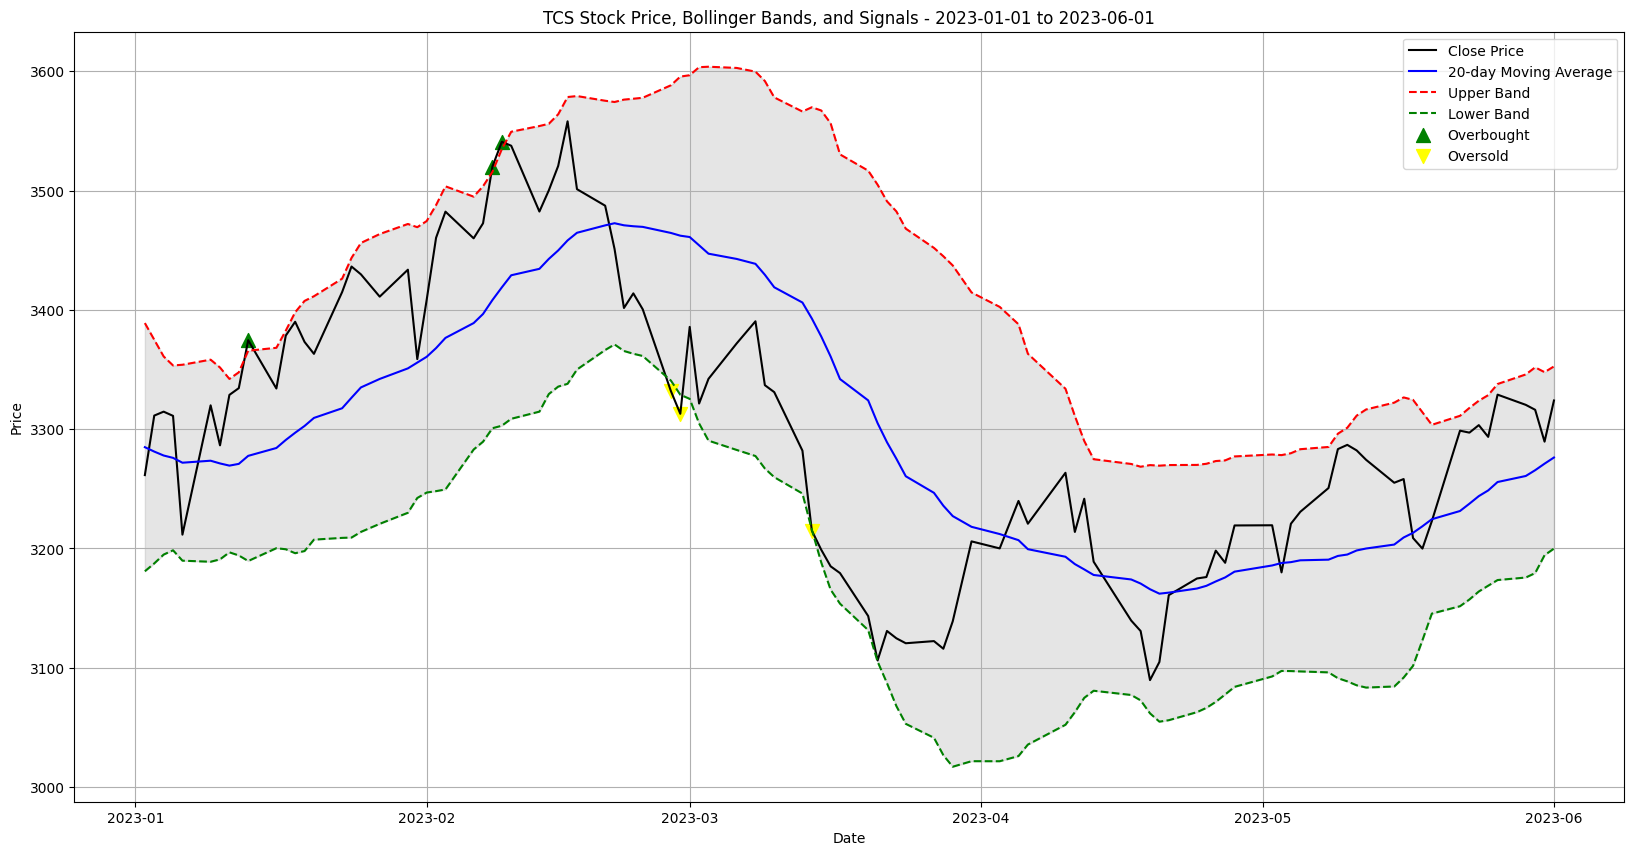

In [172]:
plt.figure(figsize=(20, 10))

plt.plot(selected_data.index, selected_data['Close'], label='Close Price', color='black')
plt.plot(selected_data.index, selected_data['20_MA'], label='20-day Moving Average', color='blue')
plt.plot(selected_data.index, selected_data['upper_band'], label='Upper Band', color='red', linestyle='dashed')
plt.plot(selected_data.index, selected_data['lower_band'], label='Lower Band', color='green', linestyle='dashed')
plt.fill_between(selected_data.index, selected_data['upper_band'], selected_data['lower_band'], color='gray', alpha=0.2)

# Add triangles for signals with increased marker size
overbought_dates = selected_data[selected_data['Signal'] == -1].index
oversold_dates = selected_data[selected_data['Signal'] == 1].index


plt.scatter(overbought_dates, selected_data.loc[overbought_dates, 'Close'], marker='^', color='green', label='Overbought', s=100)
plt.scatter(oversold_dates, selected_data.loc[oversold_dates, 'Close'], marker='v', color='yellow', label='Oversold', s=100)

plt.title(f"{symbol} Stock Price, Bollinger Bands, and Signals - {start_date} to {end_date}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()